In [1]:
from random import choice
from numpy import array, dot, random

Create the step function 

In [3]:
unit_step = lambda x: 0 if x < 0 else 1

Next we need to map the possible input to the expected output. The first two entries of the NumPy array in each tuple are the two input values. The second element of the tuple is the expected result. And the third entry of the array is a "dummy" input (also called the bias) which is needed to move the threshold (also known as the decision boundary) up or down as needed by the step function. Its value is always 1, so that its influence on the result can be controlled by its weight.

In [8]:
train_data = [(array([0,0,0]),0),
              (array([0,1,1]),1),
              (array([1,0,1]),1),
              (array([1,1,1]),1)]

As we can see, this training sequence maps exactly to the definition of the OR function


Next we'll choose three random numbers between 0 and 1 as the initial weights:

In [12]:
w = random.rand(3)

Now on to some variable initializations. The errors list is only used to store the error values so that they can be plotted later on. The eta variable controls the learning rate. And n specifies the number of learning iterations.

In [10]:
errors = []
eta = 0.2
n = 100

In order to find the ideal values for the weights w, we try to reduce the error magnitude to zero. In this simple case n = 100 iterations are enough; for a bigger and possibly "noisier" set of input data much larger numbers should be used.

First we get a random input set from the training data. Then we calculate the dot product (sometimes also called scalar product or inner product) of the input and weight vectors. This is our (scalar) result, which we can compare to the expected value. If the expected value is bigger, we need to increase the weights, if it's smaller, we need to decrease them. This correction factor is calculated in the last line, where the error is multiplied with the learning rate (eta) and the input vector (x). It is then added to the weights vector, in order to improve the results in the next iteration.

In [13]:
for i in xrange(n):
    x, excepted = choice(train_data)
    result = dot(w, x)
    error = excepted - unit_step(result)
    errors.append(error)
    w += eta * error * x

In [16]:
for x, _ in train_data:
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: 0.0 -> 1
[0 1]: 0.543301874357 -> 1
[1 0]: 0.175778510161 -> 1
[1 1]: 0.555095828844 -> 1


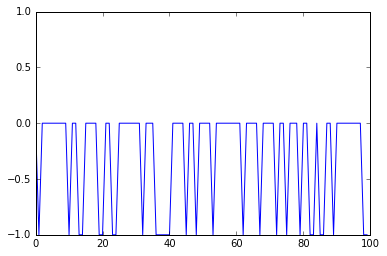

In [18]:
from pylab import plot, ylim
%matplotlib inline
ylim([-1,1])
plot(errors)

It's easy to see that the errors stabilize around the 60th iteration. If you doubt that the errors are definitely eliminated

# Entire Code

In [ ]:
from random import choice
from numpy import array, dot, random

unit_step = lambda x: 0 if x < 0 else 1

training_data = [
    (array([0,0,1]), 0),
    (array([0,1,1]), 1),
    (array([1,0,1]), 1),
    (array([1,1,1]), 1),
]

w = random.rand(3)
errors = []
eta = 0.2
n = 100

for i in xrange(n):
    x, expected = choice(training_data)
    result = dot(w, x)
    error = expected - unit_step(result)
    errors.append(error)
    w += eta * error * x

for x, _ in training_data:
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

In [19]:
# Create some training data
training_data_or = [
    (array([0, 0, 1]), 0),
    (array([0, 1, 1]), 1),
    (array([1, 0, 1]), 1),
    (array([1, 1, 1]), 1),
]

training_data_and = [
    (array([0, 0, 1]), 0),
    (array([0, 1, 1]), 0),
    (array([1, 0, 1]), 0),
    (array([1, 1, 1]), 1),
]

training_data_not = [
    (array([0]), 1),
    (array([1]), 0),
]


In [21]:
def run_perceptron(training_data):
    errors = []
    bias = 0.2
    steps = 100
    # Make the randomized vector length dynamic
    vector_length = len(training_data[0][0])
    # Get a random 3-vector between 0 and 1
    # e.g. [0.03249, 0.12452, 0.49032]
    # This is used as the starting point
    rand_vec3 = random.rand(vector_length)
    print('\nStarting seed vector: {}'.format(rand_vec3))

    for _ in xrange(steps):
        vec3, expected = choice(training_data)
        # Get the dot product of the randomized vector and the training vector
        result = dot(rand_vec3, vec3)
        # Get the offset of the expected and the unit step value
        offset = expected - unit_step(result)
        errors.append(offset)
        # Update the starting vector
        rand_vec3 += bias * offset * vec3

    # Run it for visualization of the progress
    for vec3, expected in training_data:
        result = dot(vec3, rand_vec3)
        print("{}: {} = {} (expected {})".format(
            vec3[:2], result, unit_step(result), expected))


In [22]:
run_perceptron(training_data_or)
run_perceptron(training_data_and)
# This one trains much faster, as the number of cases is halved.
run_perceptron(training_data_not)


Starting seed vector: [ 0.53432601  0.77342983  0.77906163]
[0 0]: -0.0209383737306 = 0 (expected 0)
[0 1]: 0.752491458603 = 1 (expected 1)
[1 0]: 0.513387638859 = 1 (expected 1)
[1 1]: 1.28681747119 = 1 (expected 1)

Starting seed vector: [ 0.86605527  0.94884696  0.43782296]
[0 0]: -0.562177039631 = 0 (expected 0)
[0 1]: -0.0133300830841 = 0 (expected 0)
[1 0]: -0.0961217705629 = 0 (expected 0)
[1 1]: 0.452725185984 = 1 (expected 1)

Starting seed vector: [ 0.47829733]
[0]: -0.0 = 1 (expected 1)
[1]: -0.121702670168 = 0 (expected 0)
